<a href="https://colab.research.google.com/github/Mondal-Indrani/Fake-News-Detection-using-ML/blob/main/Feke_News_Detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Fake news Detaction using ML**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [6]:
fake.shape

(23481, 4)

In [7]:
true.shape

(21417, 4)

## **Data Cleaning and preparation**

In [8]:
#add flag to track fake or real
fake['target'] = 'fake'
true['target'] = 'true'

In [9]:
#concatrnate dataframes
data=pd.concat([fake, true]).reset_index(drop = True )
data.shape

(44898, 5)

In [10]:
#Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
#check the data
data.head()

,title,text,subject,date,target
0,"As Tillerson heads to Pakistan, Islamabad wary...",ISLAMABAD (Reuters) - As U.S. Secretary of Sta...,worldnews,"October 23, 2017",true
1,Senate Republican leader: Obama politicizing S...,WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,"March 16, 2016",true
2,SABO…The Most BADASS CONSERVATIVE ARTIST In Am...,"Hardcore, unconventional, conservative and bad...",politics,"Feb 27, 2017",fake
3,BRICS name Pakistan-based militant groups as r...,"XIAMEN, China (Reuters) - The leaders of the f...",worldnews,"September 4, 2017",true
4,“GREXIT”? GREEKS VOTE NO ON MORE AUSTERITY IN ...,"A number of European politicians, including J...",Government News,"Jul 5, 2015",fake


In [12]:
#removing the title (we wll only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,date,target
0,ISLAMABAD (Reuters) - As U.S. Secretary of Sta...,worldnews,"October 23, 2017",true
1,WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,"March 16, 2016",true
2,"Hardcore, unconventional, conservative and bad...",politics,"Feb 27, 2017",fake
3,"XIAMEN, China (Reuters) - The leaders of the f...",worldnews,"September 4, 2017",true
4,"A number of European politicians, including J...",Government News,"Jul 5, 2015",fake


In [13]:
#convert to lower case
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,date,target
0,islamabad (reuters) - as u.s. secretary of sta...,worldnews,"October 23, 2017",true
1,washington (reuters) - u.s. senate republican ...,politicsNews,"March 16, 2016",true
2,"hardcore, unconventional, conservative and bad...",politics,"Feb 27, 2017",fake
3,"xiamen, china (reuters) - the leaders of the f...",worldnews,"September 4, 2017",true
4,"a number of european politicians, including j...",Government News,"Jul 5, 2015",fake


In [14]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
data.head()

,text,subject,date,target
0,islamabad (reuters) - u.s. secretary state rex...,worldnews,"October 23, 2017",true
1,washington (reuters) - u.s. senate republican ...,politicsNews,"March 16, 2016",true
2,"hardcore, unconventional, conservative badass ...",politics,"Feb 27, 2017",fake
3,"xiamen, china (reuters) - leaders five emergin...",worldnews,"September 4, 2017",true
4,"number european politicians, including jeroen ...",Government News,"Jul 5, 2015",fake


## **Basic data exploration**

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

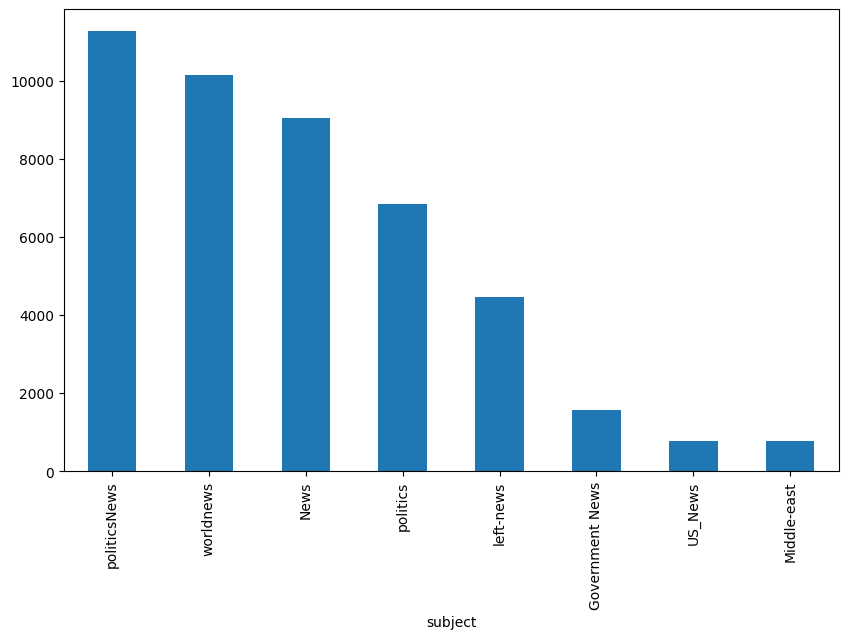

In [16]:
# How many articles per subject?
count = data.subject.value_counts()
print(count)
count.plot(kind='bar', figsize=(10, 6))
plt.show

target
fake    23481
true    21417
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

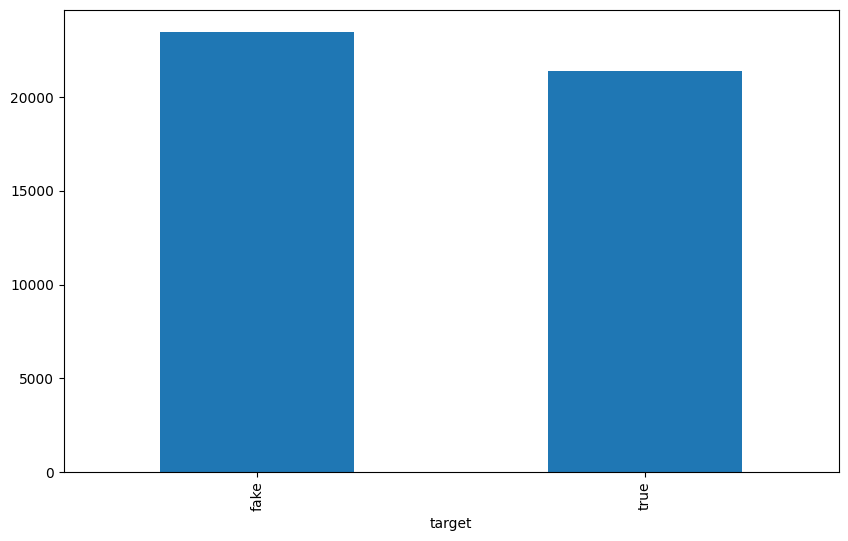

In [17]:
#how many fake and real articles?
fake_count = data.target.value_counts()
print(fake_count)
fake_count.plot(kind='bar', figsize=(10, 6))
plt.show

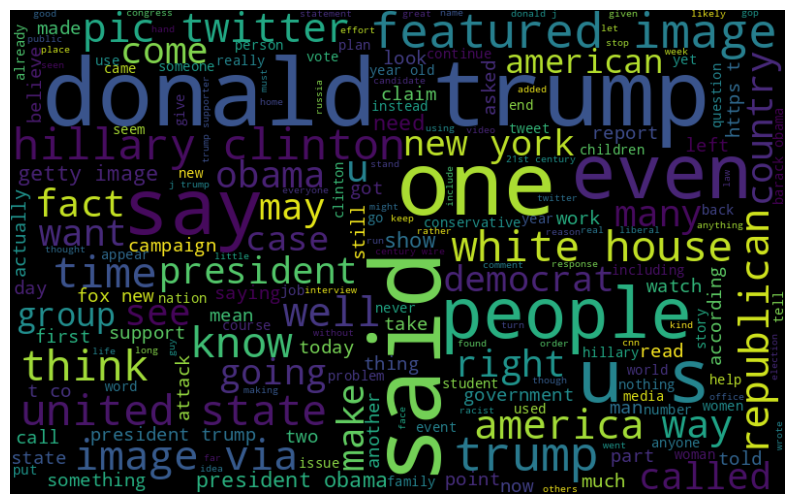

In [18]:
#word cloud for fake news
from wordcloud import WordCloud # Capitalize WordCloud
import matplotlib.pyplot as plt
fake_data=data[data["target"]=="fake"]
all_words=' '.join([text for text in fake_data.text])
wordcloud=WordCloud(width=800, height=500, random_state=20, max_font_size=100).generate(all_words) # Use WordCloud not wordcloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

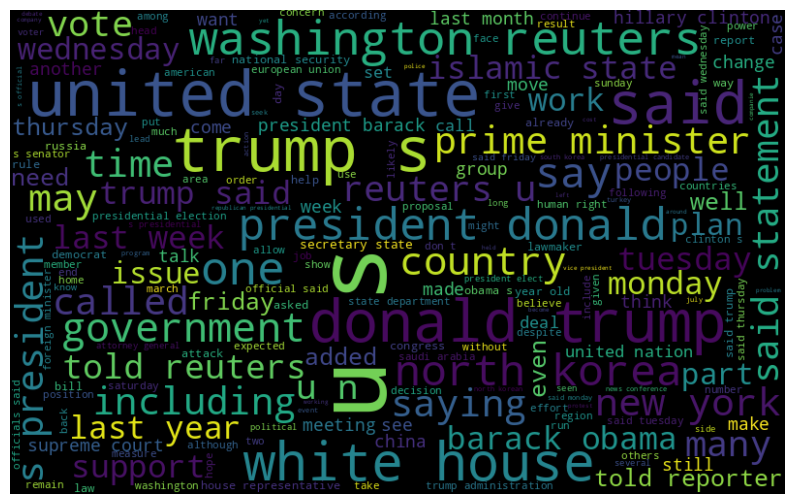

In [19]:
#word clouds of true news
from wordcloud import WordCloud # Capitalize WordCloud
import matplotlib.pyplot as plt
fake_data=data[data["target"]=="true"]
all_words=' '.join([text for text in fake_data.text])
wordcloud=WordCloud(width=800, height=500, random_state=20, max_font_size=100).generate(all_words) # Use WordCloud not wordcloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [20]:
#most frequently used word
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


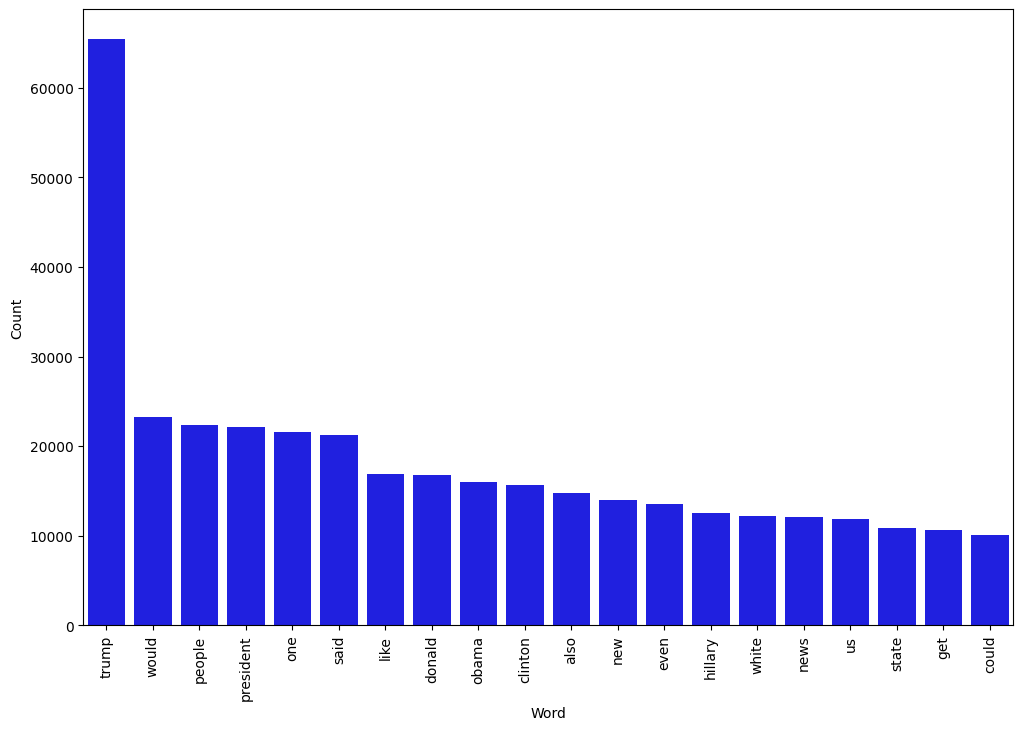

In [ ]:
#most frequently words in fake news
counter(data[data["target"] == "fake"], "text", 20)


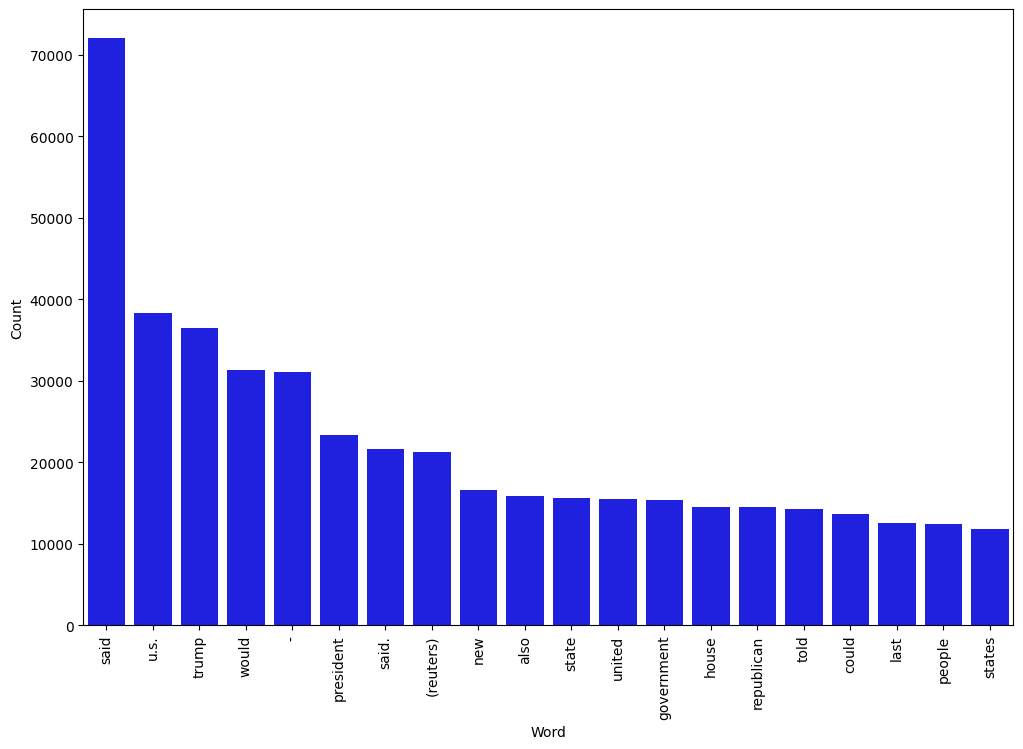

In [21]:
#most frequenty words in true news
counter(data[data["target"] == "true"], "text", 20)

## **Modeling**

In [22]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Preparing the data**

In [23]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [24]:
#Naive base classifier
dct=dict()
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
nb=MultinomialNB()
pipe=Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('model', nb)])
model=pipe.fit(X_train, y_train)
prediction=model.predict(X_test)
dct['Naive Bayes']=metrics.accuracy_score(y_test, prediction)
print("accuracy: %s" % metrics.accuracy_score(y_test, prediction))
dct['Naive Bayes']=round(accuracy_score(y_test, prediction),2 )
dct

accuracy: 0.9398663697104677


{'Naive Bayes': 0.94}

Confusion matrix, without normalization


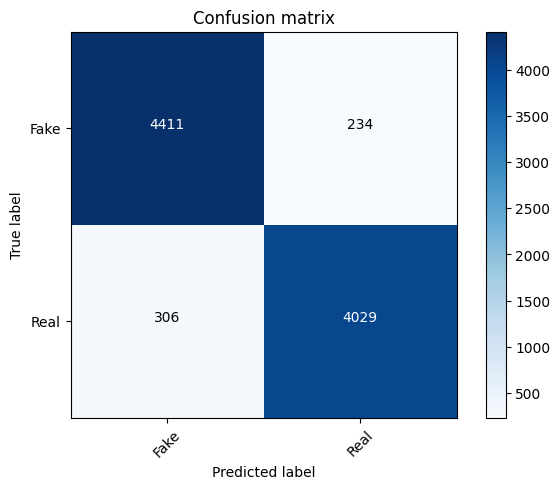

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **Logistic Regression**

In [26]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.93%


Confusion matrix, without normalization


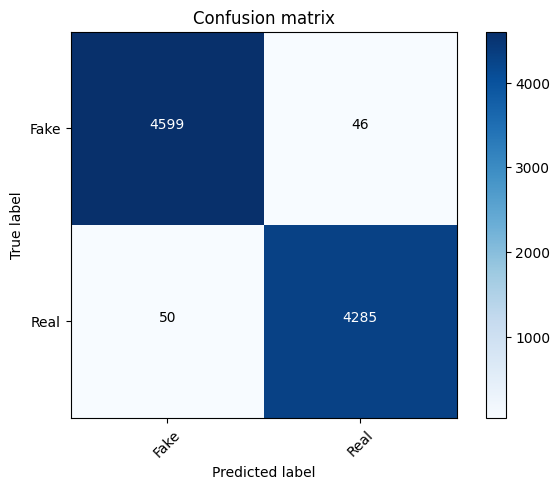

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.64%


Confusion matrix, without normalization


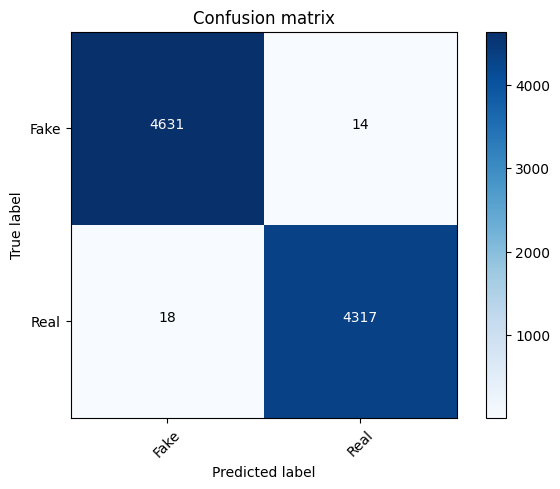

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **Random forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.03%


Confusion matrix, without normalization


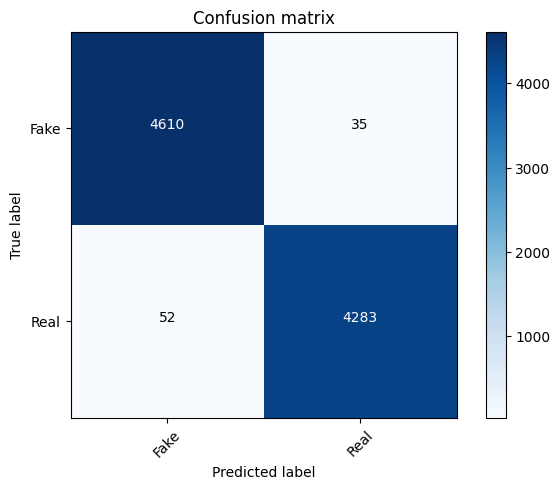

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **SVM(Support Vector Machine)**

In [32]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.57%


Confusion matrix, without normalization


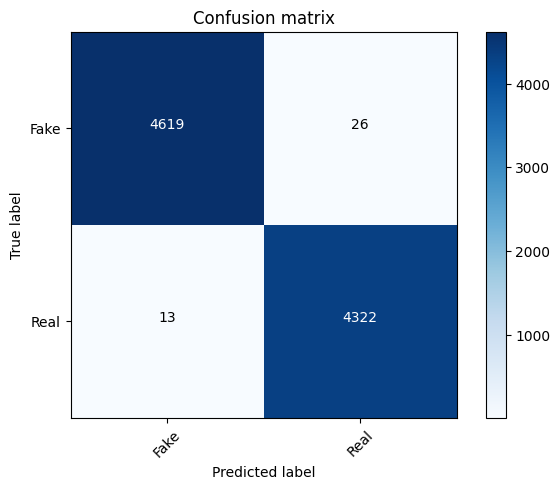

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **Compare between different models**

([<matplotlib.axis.YTick at 0x7d6b385486a0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

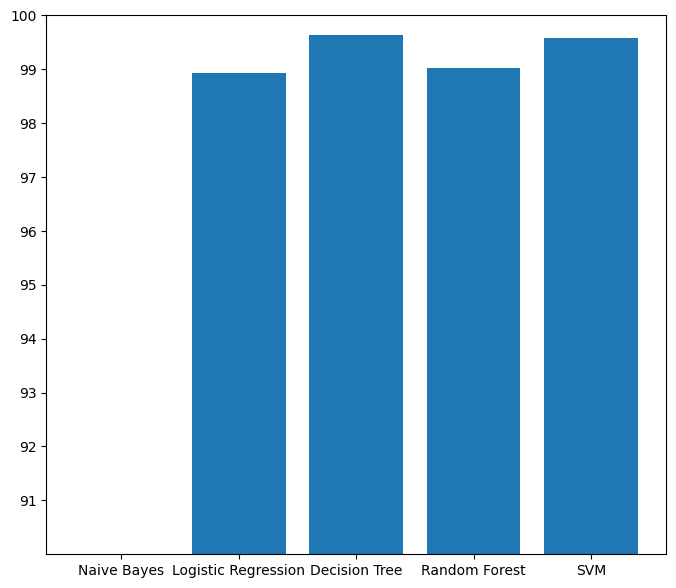

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

Decison Tree model gives best solution compare to other modeles.